# Load traffic data

In [77]:
import pandas as pd
import numpy as np
import datetime
import json

from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colrs

plt.rcParams['font.size'] = 18

## Constants

In [78]:
city_dims = {
    'Bordeaux': (334, 342),
    'Clermont-Ferrand': (208, 268),
    'Dijon': (195, 234),
    'France': (9742, 9588),
    'Grenoble': (409, 251),
    'Lille': (330, 342),
    'Lyon': (426, 287),
    'Mans': (228, 246),
    'Marseille': (211, 210),
    'Metz': (226, 269),
    'Montpellier': (334, 327),
    'Nancy': (151, 165),
    'Nantes': (277, 425),
    'Nice': (150, 214),
    'Orleans': (282, 256),
    'Paris': (409, 346),
    'Rennes': (423, 370),
    'Rouen': (327, 373),
    'Saint-Etienne': (305, 501),
    'Strasbourg': (296, 258),
    'Toulouse': (280, 347),
    'Tours': (251, 270)
    }

## Load data

In [79]:
# let's load data from March 16th, 2019 on Lyon for the mobile service YouTube
day_str = '20190316'
city_str = 'Lyon'
app_str = 'YouTube'

# downlink traffic file
traffic_file_dn = f'./data/{city_str}_{app_str}_{day_str}_DL.txt'

# let's make a list of 15 min time intervals to use as column names
day = datetime.datetime.strptime(day_str, '%Y%m%d')
times = [day + datetime.timedelta(minutes=15*i) for i in range(96)]
times_str = [t.strftime('%H:%M') for t in times]

# column names
columns = ['tile_id'] + times_str

# let's load the data of the downlink traffic
df_traffic_dn = pd.read_csv(traffic_file_dn, sep=' ', names=columns)
df_traffic_dn.head(10)

tile_id  00:00  00:15  00:30  00:45  01:00  01:15  01:30  01:45  02:00   
0       66   6218   4701   6009   5745   4556   3928   2500   1885   2422  \
1      353   7591   4633   6074   5492   4570   4390   2415   1990   2555   
2      354   5548   4357   5449   5139   4166   3751   2311   1983   2700   
3      640   7763   3822   4785   4131   3546   4125   1816   1791   2287   
4      641   5663   4389   5167   5115   4074   3793   2256   2089   2805   
5      642   6789   4238   8300   9971   6441   5564   3556   2811   3862   
6      643   6085   3667   7827   9783   6065   5163   3495   2778   3569   
7      926   5173   1703   2617   2663   2612   3036   1221    984   1170   
8      927   6275   2368   3151   2796   2640   3193   1202   1384   1725   
9      928   4523   2769   3539   3610   3065   2881   1548   1565   2129   

   ...  21:30  21:45  22:00  22:15  22:30  22:45  23:00  23:15  23:30  23:45  
0  ...   6261   6778   6191   8334   9329   6942   8601   6516   4359   4370  
1  ...   6495   7170   6688   8815  11450   8248  10175   6841   4550   4635  
2  ...   6006   6197   5759   7557   8967   7096   7905   6166   3972   4059  
3  ...   5518   6244   5687   7107  10105   7170   9089   6001   3865   3959  
4  ...   5770   6116   5972   7209   8643   7231   7926   6192   3833   4005  
5  ...   8655   6303   9130  11506   9171   8758   9592  11061   9384   7036  
6  ...   9105   6223   9045  11187   7958   8205   8353  10551   9462   6796  
7  ...   2907   3502   3226   4061   5920   4545   6709   3167   2361   2583  
8  ...   2939   3461   3530   4213   6660   4968   7036   3714   2612   2919  
9  ...   3242   3461   3695   4421   5663   5047   6100   3993   2561   2999  

[10 rows x 97 columns]

### Matrix representation

In [5]:
# fetch the number of rows and columns of the city
n_rows, n_cols = city_dims[city_str]

# create a 3D array to store the traffic values
# the first dimension is the time, the second and third are the rows and columns (spatial dimensions)
city_traffic = np.zeros((len(times_str), n_rows, n_cols))

# fill the array with the traffic values
for _, row in df_traffic_dn.iterrows():
    tile_id = row['tile_id']
    row_index = int(tile_id // n_cols)
    col_index = int(tile_id % n_cols)

    traffic_values = np.array(row[times_str])
    city_traffic[:, row_index, col_index] = traffic_values

## Plot the traffic map

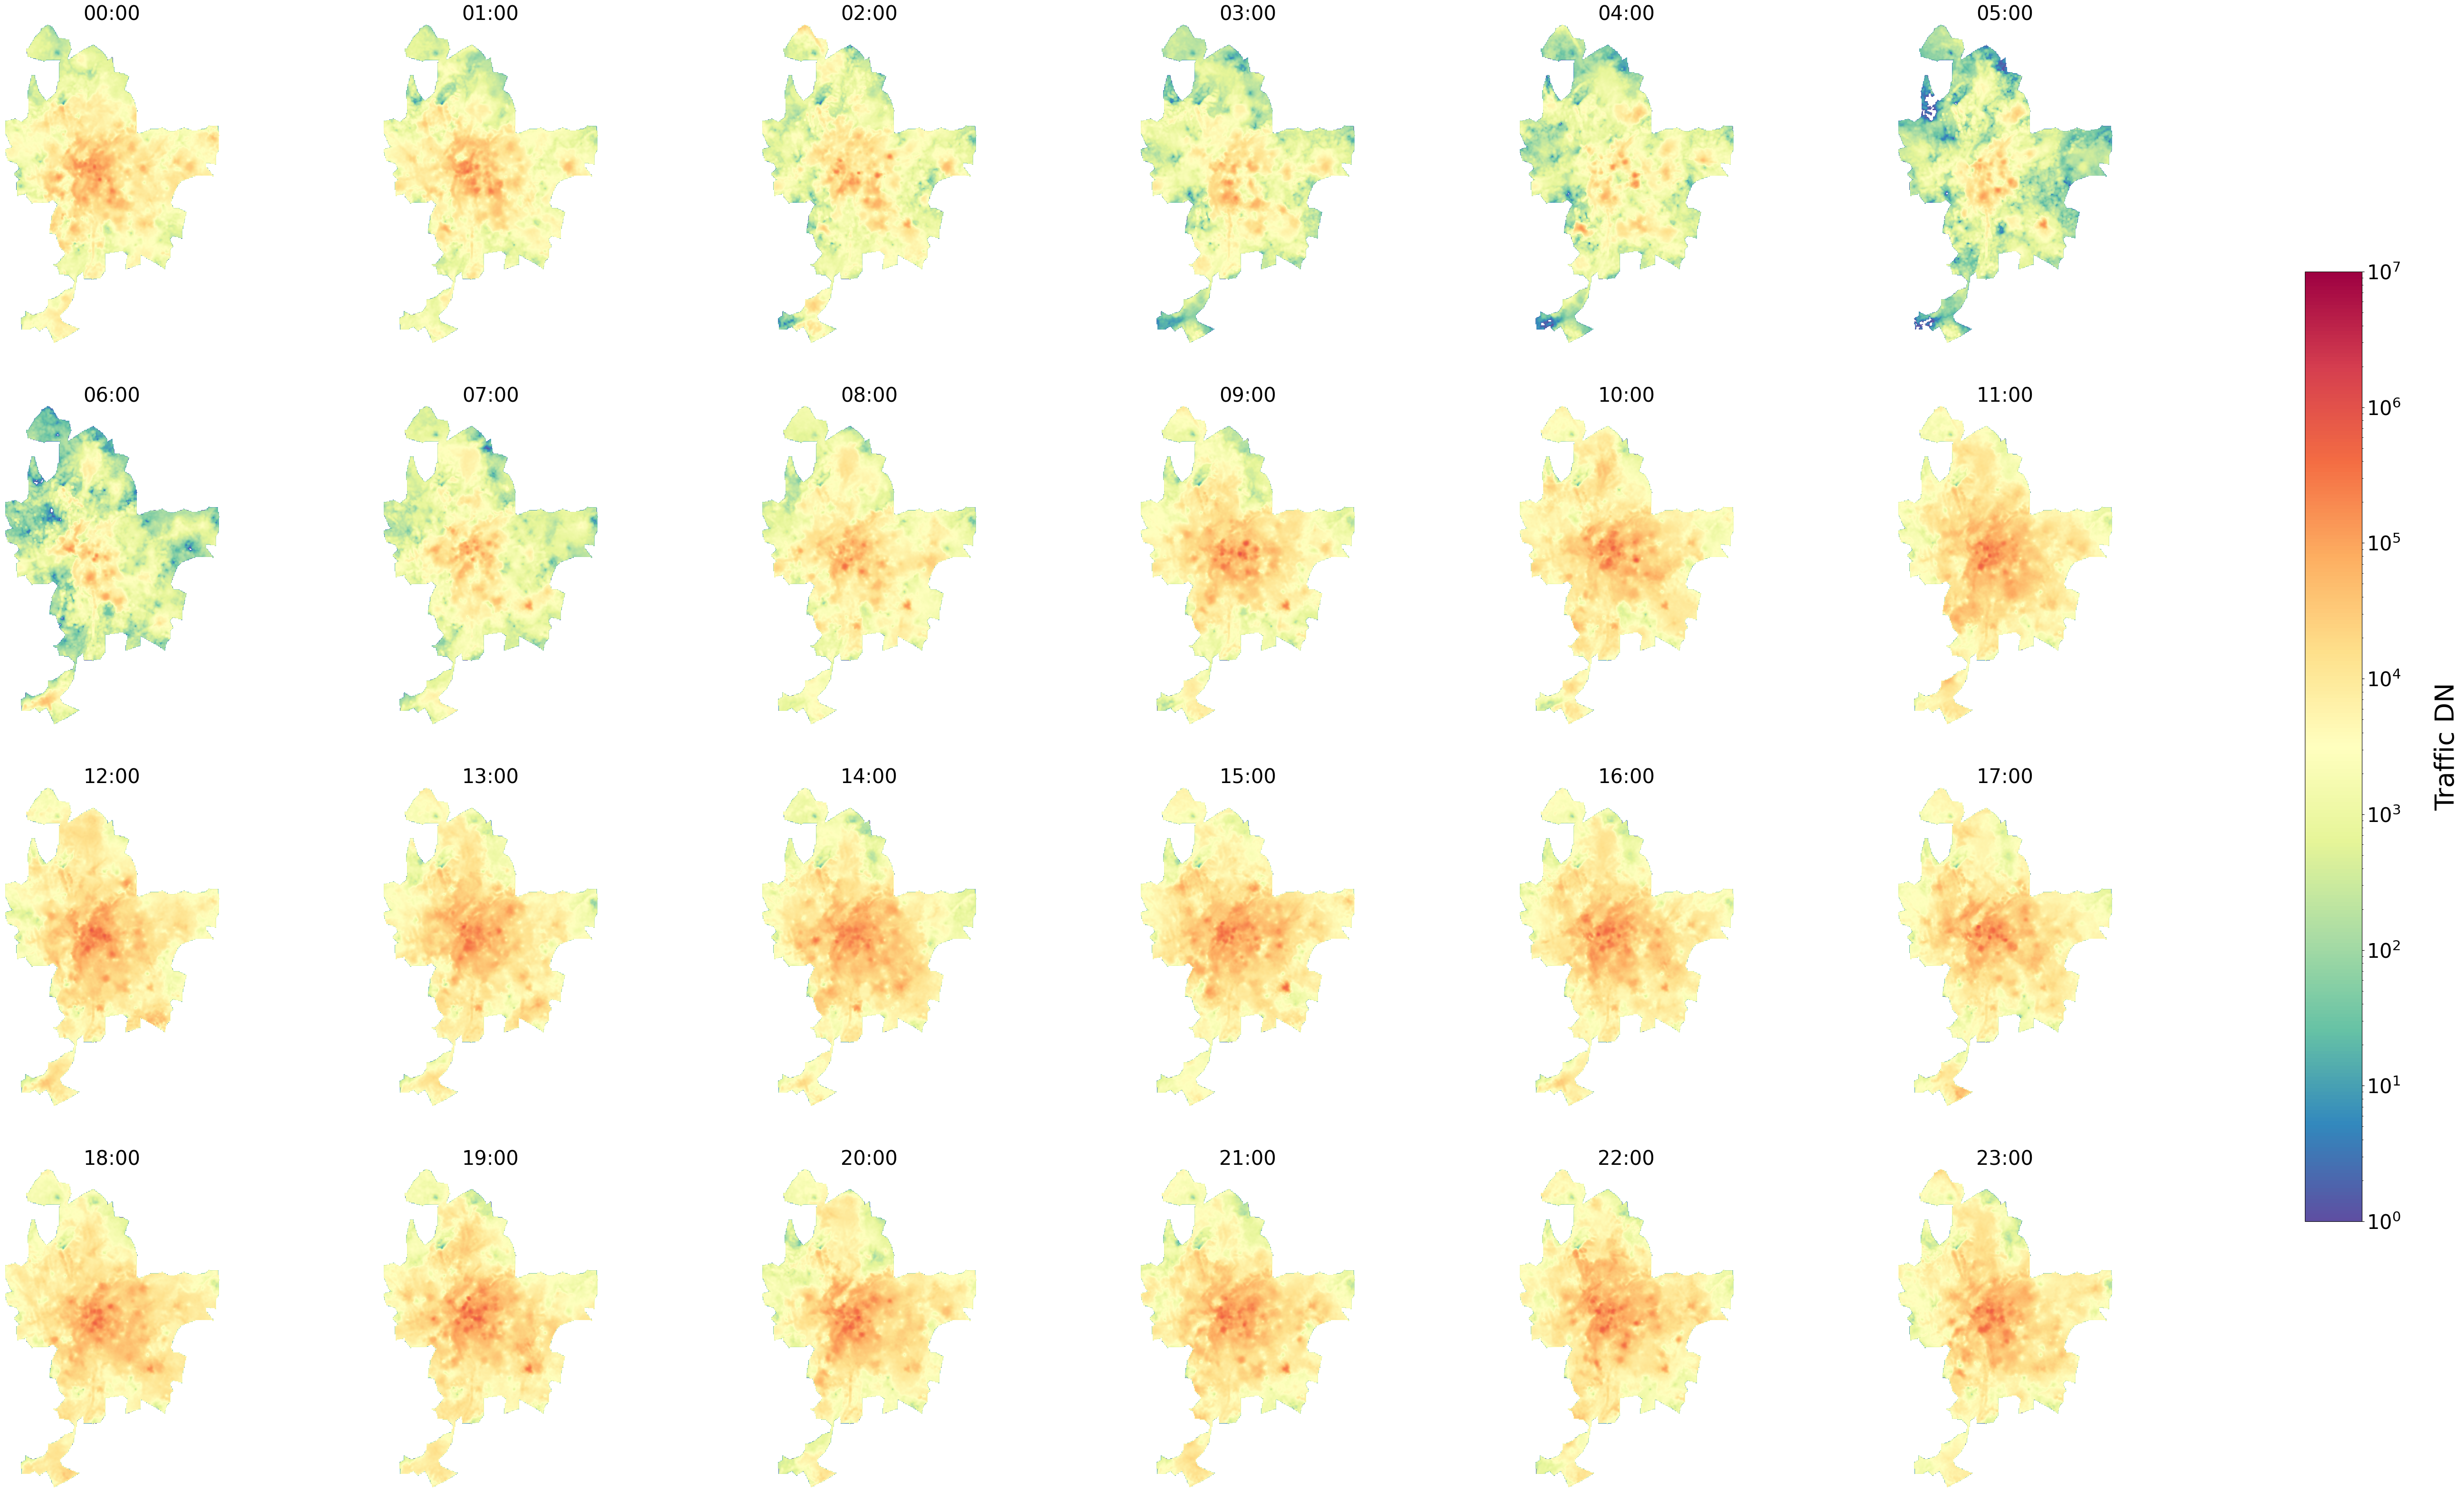

In [6]:
cmap_traffic = cm.get_cmap('Spectral_r').copy()
cmap_traffic.set_under('w', 0)
norm_traffic = colrs.LogNorm(vmin=1e0, vmax=1e7)

# let's plot the traffic map of the city for the first 15 min of each hour
fig, axs = plt.subplots(4, 6, figsize=(60, 40))
axs = axs.flatten()

for hour in range(24):
    ax = axs[hour]

    #recall that we have 15 min intervals, so we need to multiply the hour by 4
    city_traffic_time = city_traffic[ hour * 4 ] 

    ax.imshow(city_traffic_time, origin='lower', cmap=cmap_traffic, norm=norm_traffic)
    ax.set_title(f'{str(hour).zfill(2)}:00', fontsize=30)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('off')

ax = fig.add_axes([0.95, 0.25, 0.02, .5])
sm = plt.cm.ScalarMappable(cmap=cmap_traffic, norm=norm_traffic)
sm.set_array([])
clb = plt.colorbar(sm, cax=ax, orientation='vertical') 
clb.set_label('Traffic DN', rotation=90, fontsize=40, labelpad=50)
clb.ax.tick_params(labelsize=30)
clb.ax.xaxis.set_ticks_position('default')

plt.show()

## Total traffic time series - Youtube 

In [ ]:
traffic_time_series = city_traffic.sum(axis=(1, 2))

fig = plt.figure(figsize=(12, 6))
plt.plot(times, traffic_time_series, linewidth=1, color='tab:blue', label='Total Traffic DN')
plt.xlabel('Time')
plt.ylabel(f'{app_str} Traffic DN ')
plt.xticks(rotation=45)
plt.grid(axis='x', alpha=0.25)
plt.xlim(times[0], times[-1])
plt.legend(loc='upper right',
            ncol=1,
            bbox_to_anchor=(1, 1.1), 
            fancybox=False, 
            frameon=False)
plt.show()

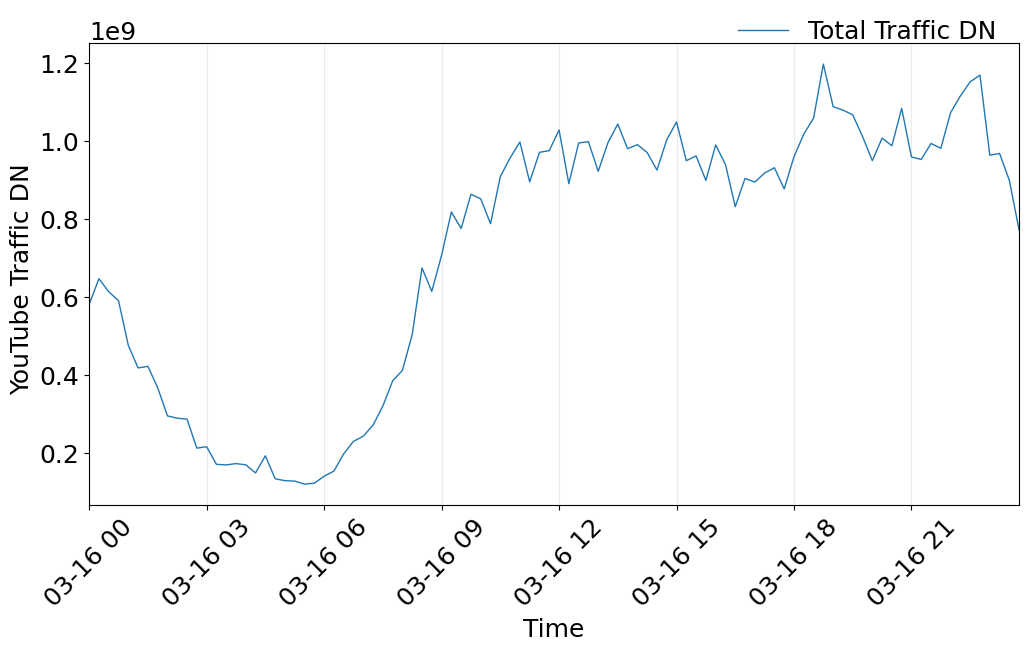

In [60]:
traffic_time_series = city_traffic.sum(axis=(1, 2))

fig = plt.figure(figsize=(12, 6))
plt.plot(times, traffic_time_series, linewidth=1, color='tab:blue', label='Total Traffic DN')
plt.xlabel('Time')
plt.ylabel(f'{app_str} Traffic DN ')
plt.xticks(rotation=45)
plt.grid(axis='x', alpha=0.25)
plt.xlim(times[0], times[-1])
plt.legend(loc='upper right',
            ncol=1,
            bbox_to_anchor=(1, 1.1), 
            fancybox=False, 
            frameon=False)
plt.show()

### Traffic time series for a specific tile

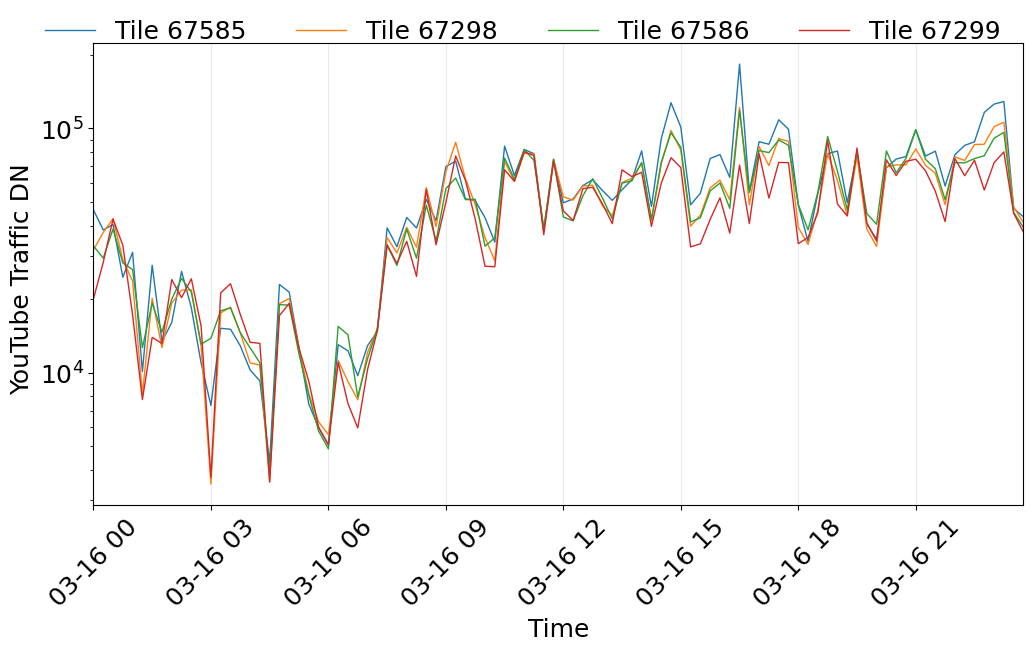

In [72]:
random_tiles = [(235,140), (234, 140), (235, 141), (234, 141)]

plt.figure(figsize=(12, 6))

for random_tile in random_tiles:
    tile_id = random_tile[0] * n_cols + random_tile[1]
    traffic_tile = city_traffic[:, random_tile[0], random_tile[1]]
    plt.plot(times, traffic_tile, linewidth=1, label=f'Tile {tile_id}')

plt.xlabel('Time')
plt.ylabel(f'{app_str} Traffic DN ')
plt.xticks(rotation=45)
plt.grid(axis='x', alpha=0.25)
plt.xlim(times[0], times[-1])
plt.legend(loc='upper right',
            ncol=4,
            bbox_to_anchor=(1, 1.1), 
            fancybox=False, 
            frameon=False)
plt.yscale('log')
plt.show()

## Avoiding tiles outside the city

In [31]:
# let's load the geojson file of the city
city_geojson_file = f'./data/{city_str}.geojson'
fd = open(city_geojson_file)
city_geojson = json.load(fd)
fd.close()

# showing one of the features
city_geojson['features'][0]

{'type': 'Feature',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[4.7662070878542515, 45.55631465259445],
    [4.766246657177647, 45.55721386239888],
    [4.767526651889026, 45.5571860567685],
    [4.767487061740877, 45.55628684742171],
    [4.7662070878542515, 45.55631465259445]]]},
 'properties': {'tile_id': 66}}

In [39]:
# we can use the tile_id to find the row and column index of the tile
# and most important only valid tiles are present in the geojson file
tile_id = city_geojson['features'][0]['properties']['tile_id']

row_index = int(tile_id // n_cols)
col_index = int(tile_id % n_cols)
print(f'row_index: {row_index}, col_index: {col_index}')

row_index: 0, col_index: 66


In [33]:
# let's create a mask of the city, where the value 1 indicates a valid tile and 0 an invalid tile
city_mask = np.zeros((n_rows, n_cols))

for feature in city_geojson['features']:
    tile_id = feature['properties']['tile_id']
    row_index = int(tile_id // n_cols)
    col_index = int(tile_id % n_cols)
    city_mask[row_index, col_index] = 1

### Plot the mask

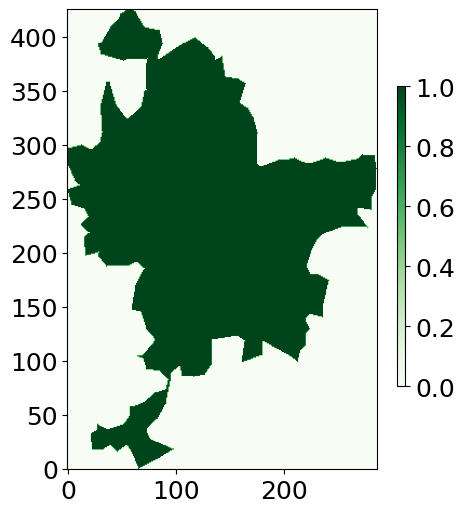

In [40]:
fig = plt.figure(figsize=(4, 6))
plt.imshow(city_mask, origin='lower', cmap='Greens')

cax = fig.add_axes([0.95, 0.25, 0.02, .5])
plt.colorbar(cax=cax)

plt.show()

## Total traffic time series - Youtube 

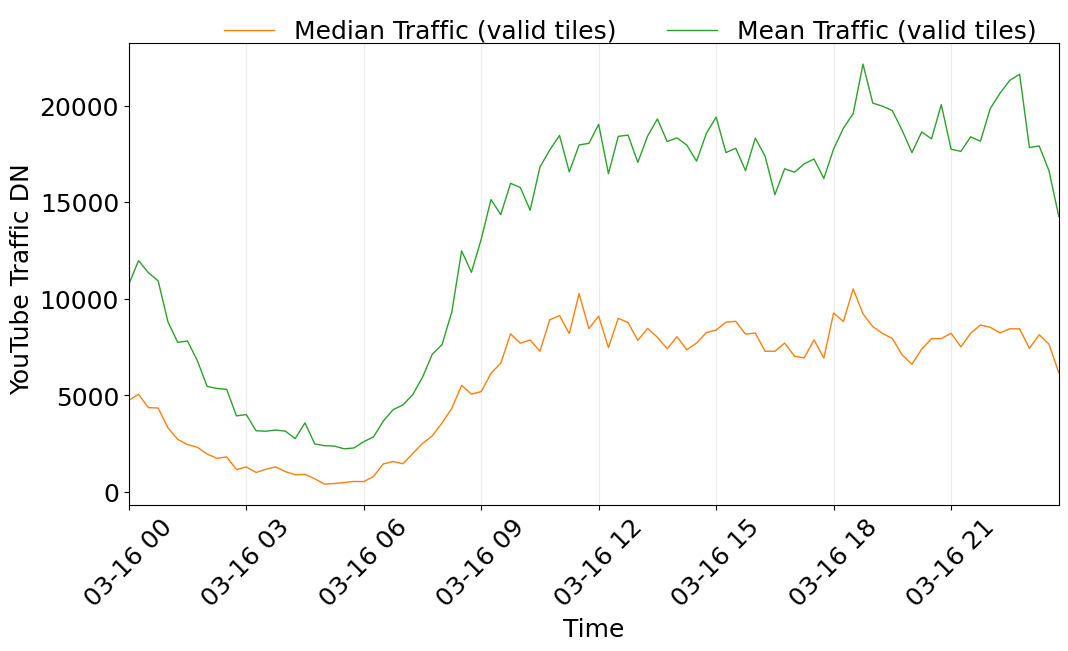

In [76]:
median_traffic = [np.median(city_traffic[time_index][city_mask == 1]) for time_index in range(len(times_str))]
mean_traffic = [np.mean(city_traffic[time_index][city_mask == 1]) for time_index in range(len(times_str))]

fig = plt.figure(figsize=(12, 6))
plt.plot(times, median_traffic, linewidth=1, color='tab:orange', label='Median Traffic (valid tiles)')
plt.plot(times, mean_traffic, linewidth=1, color='tab:green', label='Mean Traffic (valid tiles)')

plt.xlabel('Time')
plt.ylabel(f'{app_str} Traffic DN ')
plt.xticks(rotation=45)
plt.grid(axis='x', alpha=0.25)
plt.xlim(times[0], times[-1])
plt.legend(loc='upper right',
            ncol=3,
            bbox_to_anchor=(1, 1.1), 
            fancybox=False, 
            frameon=False)
plt.show()